# Read the Data and Pick 10 Features for Research

### Our main goal: Among the selected features, identify which features are related with diabetes, and how they are correlated.

### Features we picked:

#### 1. Age (AGE_P)

Type: Continuous variable

Description: Represents the respondent's age in years.

Example values: 18, 35, 60, etc.

Why: Diabetes risk increases with age, especially for Type 2 diabetes.


#### 2. Sex (SEX)

Type: Categorical variable

Possible values:

1: Male

2: Female

7: Refused

9: Don't know

Why: There may be gender differences in diabetes prevalence and risk factors.


#### 3. Body Mass Index (BMI)

Type: Continuous variable

Description: The body mass index (BMI) is calculated from height and weight.

Example values:

<18.5: Underweight

18.5–24.9: Normal weight

25–29.9: Overweight

30 or greater: Obesity

Why: Obesity is one of the strongest risk factors for Type 2 diabetes.


#### 4. Hypertension (HYPEV)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: High blood pressure is often associated with diabetes.


#### 5. Cholesterol Levels (CHLEV)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: High cholesterol is a common comorbidity with diabetes and can lead to related complications.




#### 6. Smoking Status SMKNOW (Current Smoking Status)


Type: Categorical variable

Possible values:

1: Every day

2: Some days

3: Not at all

7: Refused

9: Don’t know

Why: Smoking has been linked to an increased risk of diabetes and other chronic conditions.


#### 7. Family History of Diabetes (DIBREL)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: A family history of diabetes significantly increases an individual's risk.


#### 8. Gestational Diabetes (DIBGDM)

Type: Categorical variable

Possible values:

1: Yes

2: No

7: Refused

9: Don’t know

Why: Women who develop gestational diabetes during pregnancy have a higher risk of developing Type 2 diabetes later in life.


#### 9. Alcohol Consumption (ALC1YR)

Type: Categorical variable

Possible values:

1: Yes (consumed alcohol in the past year)

2: No (did not consume alcohol in the past year)

7: Refused (refused to answer the question)

9: Don't know (unsure if consumed alcohol in the past year)

Why: Excessive alcohol consumption can increase the risk of diabetes through its impact on weight and liver function.


### Tag for Diabetes (DIBEV1)

Type: Categorical variable

Possible values:

1: Yes (the respondent has been diagnosed with diabetes)

2: No (the respondent has not been diagnosed with diabetes)

3: Borderline (the respondent has been told they have borderline diabetes)

7: Refused (the respondent refused to answer)

9: Don't know (the respondent is unsure if they have been diagnosed with diabetes)

In [115]:
import pandas as pd

In [59]:
df = pd.read_csv("samadult.csv")
df.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,BFWH_05,BFWH_06,BFWH_07,BFWH_08,BFWH_09,BFWH_10,BNRFALL,BINTHI,BINTTR,BINTRS
0,1,1,1,1,11241.0,26100,1,12,8,2,...,2.0,2.0,2.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0
1,1,2,1,1,5620.5,11294,2,12,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2,1,2919.3,2506,1,12,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,3,1,8883.8,9267,2,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,5,1,3300.8,3443,2,3,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# List of columns to keep (10 key features + diabetes indicator column)
columns_to_keep = [
    'AGE_P',     # Age
    'SEX',       # Sex
    'BMI',       # Body Mass Index
    'HYPEV',     # Hypertension diagnosis
    'CHLEV',     # Cholesterol diagnosis
    'SMKNOW',    # Current smoking status
    'ALC1YR',    # Alcohol Consumption
    'DIBREL',    # Family history of diabetes
    'DIBGDM',    # Gestational diabetes history
    'DIBEV1'     # Diabetes diagnosis (Yes/No/Borderline)
]

In [61]:
# Create a new DataFrame with only the selected columns
samadult = df[columns_to_keep]
samadult.head()

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1,3336,2,2,NaN,1,1,NaN,2
1,24,2,2019,2,2,NaN,1,2,NaN,2
2,76,1,2727,1,1,NaN,2,2,NaN,2
3,36,2,3862,2,2,NaN,1,1,2.0,2
4,35,2,3995,2,2,1.0,1,1,2.0,2


In [62]:
# Find BMI column doesn't have decimal point. Add it in
samadult['BMI']=samadult['BMI']/100
samadult.head()

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/2998434094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI']=samadult['BMI']/100


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1,33.36,2,2,NaN,1,1,NaN,2
1,24,2,20.19,2,2,NaN,1,2,NaN,2
2,76,1,27.27,1,1,NaN,2,2,NaN,2
3,36,2,38.62,2,2,NaN,1,1,2.0,2
4,35,2,39.95,2,2,1.0,1,1,2.0,2


# Preprocessing the Dataset

## Reduce Outliers

In [63]:
#Suspect outlier in BMI column (such as BMI = 99.99)
#Convert the BMI into category to reduce the impact

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)
samadult

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/3042757942.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1,Obesity,2,2,NaN,1,1,NaN,2
1,24,2,Normal weight,2,2,NaN,1,2,NaN,2
2,76,1,Overweight,1,1,NaN,2,2,NaN,2
3,36,2,Obesity,2,2,NaN,1,1,2.0,2
4,35,2,Obesity,2,2,1.0,1,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...
33023,56,1,Normal weight,2,2,3.0,1,1,NaN,2
33024,58,1,Obesity,1,1,3.0,1,1,NaN,2
33025,71,2,Overweight,1,1,3.0,2,1,2.0,1
33026,64,1,Overweight,1,1,3.0,2,2,NaN,2


### Can converting BMI number into categories reduce the impact of outliers?

Yes. Here are reasons:

### Outlier Mitigation:

When converting to categories, you're mapping a potentially extreme or erroneous value (like 99.99, which is unreasonably high for BMI) into a broad category (e.g., "Obesity"). This reduces the influence that extreme values could have in the dataset, as you no longer work with exact values but with predefined ranges.

### Loss of Extremes:

For example, if you have a BMI value of 99.99, after conversion, it would fall into the "Obesity" category. This conversion disregards how extreme the value is, treating it the same as any other BMI over 30, thereby reducing its impact.

### Interpretability:

Categories are easier to interpret in studies where you're interested in general patterns (e.g., whether obesity correlates with diabetes). By categorizing BMI, you're focusing on broader trends rather than specific extreme values.

# Preprocessing the dataset

## Handle Missing Values

In [64]:
import numpy as np

In [65]:
#Besides the NaN in the dataset, we also have people who answer 9, which is don't know
#Convert option 9 as NaN for categorical data

# List of columns where the special missing values occur
categorical_columns = ['SEX', 'HYPEV', 'CHLEV', 'SMKNOW', 'DIBREL', 'DIBGDM', 'ALC1YR']

samadult[categorical_columns] = samadult[categorical_columns].replace([9], np.nan)
samadult.head(10)

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,Obesity,2.0,2.0,NaN,1.0,1.0,NaN,2
1,24,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
2,76,1.0,Overweight,1.0,1.0,NaN,2.0,2.0,NaN,2
3,36,2.0,Obesity,2.0,2.0,NaN,1.0,1.0,2.0,2
4,35,2.0,Obesity,2.0,2.0,1.0,1.0,1.0,2.0,2
5,20,2.0,Normal weight,2.0,2.0,NaN,2.0,1.0,NaN,2
6,19,2.0,Normal weight,2.0,2.0,NaN,2.0,NaN,NaN,2
7,45,2.0,Overweight,2.0,1.0,1.0,1.0,1.0,NaN,2
8,18,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
9,20,2.0,Normal weight,2.0,2.0,NaN,2.0,2.0,NaN,2


In [66]:
#Then let's check how many people refuse to answer (choose 7)
for col in categorical_columns:
    count_refused = samadult[col].value_counts().get(7, 0)  # Get the count of 7 (or 0 if not present)
    print(f"Column {col} has {count_refused} instances of value 7.")

Column SEX has 0 instances of value 7.
Column HYPEV has 21 instances of value 7.
Column CHLEV has 24 instances of value 7.
Column SMKNOW has 3 instances of value 7.
Column DIBREL has 27 instances of value 7.
Column DIBGDM has 5 instances of value 7.
Column ALC1YR has 47 instances of value 7.


In [67]:
#Since we have more than 33028 observations, and the number of observations is very small
#We can change them to the mode
import pandas as pd

# Assuming df is your DataFrame

# Loop through each column and replace "7" with the mode
for col in samadult.columns:
    mode_value = samadult[col].mode()[0]  # Get the most frequent value (mode)
    # Replace "7" with the mode, ensuring the mode itself is not 7
    if mode_value != 7:
        samadult[col].replace(7, mode_value, inplace=True)

samadult.head()

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,Obesity,2.0,2.0,NaN,1.0,1.0,NaN,2
1,24,2.0,Normal weight,2.0,2.0,NaN,1.0,2.0,NaN,2
2,76,1.0,Overweight,1.0,1.0,NaN,2.0,2.0,NaN,2
3,36,2.0,Obesity,2.0,2.0,NaN,1.0,1.0,2.0,2
4,35,2.0,Obesity,2.0,2.0,1.0,1.0,1.0,2.0,2


In [68]:
#Then let's check if all of them are converted
for col in categorical_columns:
    count_refused = samadult[col].value_counts().get(7, 0)  # Get the count of 7 (or 0 if not present)
    print(f"Column {col} has {count_refused} instances of value 7.")

Column SEX has 0 instances of value 7.
Column HYPEV has 0 instances of value 7.
Column CHLEV has 0 instances of value 7.
Column SMKNOW has 0 instances of value 7.
Column DIBREL has 0 instances of value 7.
Column DIBGDM has 0 instances of value 7.
Column ALC1YR has 0 instances of value 7.


In [69]:
#Finally, let's deal with the missing value

#First, check the percentage of missing
print(samadult.isnull().mean() * 100)

AGE_P      0.000000
SEX        0.000000
BMI        0.000000
HYPEV      0.084777
CHLEV      0.196803
SMKNOW    59.125590
ALC1YR     0.060555
DIBREL     1.341286
DIBGDM    58.771346
DIBEV1     0.000000
dtype: float64


Before we try to deal with Nan values, we remove all rows that does not have a valid value for our target DIBEV1

In [70]:
samadult = samadult[samadult["DIBEV1"].isin({1, 2})]

We also changed the target label: no diabetes from 2 to 0 for readability

In [71]:
samadult.loc[samadult["DIBEV1"] == 2, "DIBEV1"] = 0

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Since Age contains only two values, we change the value 2 to 0, so that, 0 = female and 1 = male

In [77]:
samadult.loc[samadult["SEX"]==2, "SEX"] = 0

 For columns like SMKNOW and DIBGDM, the missingness is high (59% and 58% respectively).
 
 We can use KNN imputation to fill in missing values based on similar observations.

In [80]:
#To apply KNN, let's conduct Label Encoding
from sklearn.preprocessing import LabelEncoder

# Example: Convert BMI category to numerical values using LabelEncoder
label_encoder = LabelEncoder()
samadult['BMI'] = label_encoder.fit_transform(samadult['BMI'])  # Assuming BMI is categorical
samadult

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/3796848072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = label_encoder.fit_transform(samadult['BMI'])  # Assuming BMI is categorical


,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22,1.0,1,2.0,2.0,NaN,1.0,1.0,NaN,0
1,24,0.0,0,2.0,2.0,NaN,1.0,2.0,NaN,0
2,76,1.0,2,1.0,1.0,NaN,2.0,2.0,NaN,0
3,36,0.0,1,2.0,2.0,NaN,1.0,1.0,2.0,0
4,35,0.0,1,2.0,2.0,1.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
33023,56,1.0,0,2.0,2.0,3.0,1.0,1.0,NaN,0
33024,58,1.0,1,1.0,1.0,3.0,1.0,1.0,NaN,0
33025,71,0.0,2,1.0,1.0,3.0,2.0,1.0,2.0,1
33026,64,1.0,2,1.0,1.0,3.0,2.0,2.0,NaN,0


### Nan strategy -- KNN Imputer

In [81]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Use KNNImputer for missing value imputation
imputer = KNNImputer(n_neighbors=5)
samadult_imputed = pd.DataFrame(imputer.fit_transform(samadult), columns=samadult.columns)

In [82]:
samadult_imputed

,AGE_P,SEX,BMI,HYPEV,CHLEV,SMKNOW,ALC1YR,DIBREL,DIBGDM,DIBEV1
0,22.0,1.0,1.0,2.0,2.0,1.6,1.0,1.0,1.8,0.0
1,24.0,0.0,0.0,2.0,2.0,1.8,1.0,2.0,2.0,0.0
2,76.0,1.0,2.0,1.0,1.0,1.8,2.0,2.0,2.0,0.0
3,36.0,0.0,1.0,2.0,2.0,2.4,1.0,1.0,2.0,0.0
4,35.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32118,56.0,1.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0,0.0
32119,58.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.8,0.0
32120,71.0,0.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
32121,64.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,0.0


### Preprocessing for samadult_imputed

Since we choose to fill value 9 (Don't know) with Nan and 7 (Refused) with the mode, we then fill all Nan values with KNNImputer. we can see every categorical variable that has Nan values will be filled with a float value in between the minimum and maximum original value.

In [83]:
for c in samadult_imputed.columns:
    print(samadult_imputed[c].value_counts())

85.0    1109
68.0     610
63.0     600
59.0     595
60.0     591
        ... 
80.0     245
81.0     227
82.0     206
83.0     186
84.0     176
Name: AGE_P, Length: 68, dtype: int64
0.0    17552
1.0    14571
Name: SEX, dtype: int64
2.0    10857
0.0    10403
1.0    10304
3.0      559
Name: BMI, dtype: int64
2.0    20993
1.0    11114
1.6        7
1.2        4
1.8        3
1.4        2
Name: HYPEV, dtype: int64
2.0    22592
1.0     9482
1.6       16
1.4       12
1.2       11
1.8       10
Name: CHLEV, dtype: int64
3.0    10304
1.0     4241
2.2     3677
2.0     3221
2.6     2977
1.8     2639
2.4     1529
1.6     1237
1.4     1138
2.8      897
1.2      247
3.2        9
3.4        4
8.0        3
Name: SMKNOW, dtype: int64
1.0    21035
2.0    10918
8.0      153
1.6        6
1.4        6
1.8        2
1.2        2
2.4        1
Name: ALC1YR, dtype: int64
2.0    20613
1.0    11156
1.6      143
1.8      113
1.4       67
1.2       31
Name: DIBREL, dtype: int64
2.0    26549
1.8     3811
1.0      899
1

We then standardize all columns to make sure we met the assumption of logistic regression

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression Model (KNN Imputer) Accuracy: 89.56 %
Logistic Regression Model (KNN Imputer) F1 score: 31.74 %


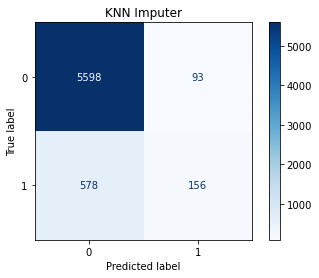

In [94]:
X = samadult_imputed.drop('DIBEV1', axis=1)
y = samadult_imputed['DIBEV1']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Model (KNN Imputer) Accuracy: {round(accuracy*100, 2)} %")
y_pred = model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Logistic Regression Model (KNN Imputer) F1 score: {round(f1*100, 2)} %")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Imputer")
plt.show()

### Preprocess Nan -- make it a new category

Preprocessing from previous steps -- excluding filling 7 with mode

In [116]:
df = pd.read_csv("samadult.csv")
samadult = df[columns_to_keep]
samadult['BMI']=samadult['BMI']/100
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obesity'

samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)
categorical_columns = ['SEX', 'HYPEV', 'CHLEV', 'SMKNOW', 'DIBREL', 'DIBGDM', 'ALC1YR']
samadult[categorical_columns] = samadult[categorical_columns].replace([9], np.nan)
samadult = samadult[samadult["DIBEV1"].isin({1, 2})]
samadult.loc[samadult["DIBEV1"] == 2, "DIBEV1"] = 0
samadult.loc[samadult["SEX"]==2, "SEX"] = 0
label_encoder = LabelEncoder()
samadult['BMI'] = label_encoder.fit_transform(samadult['BMI']) 

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/2597863787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI']=samadult['BMI']/100
/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_84198/2597863787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samadult['BMI'] = samadult['BMI'].apply(categorize_bmi)
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on 

##### Take a look at the original feature distributions

In [117]:
for c in columns_to_keep:
    print(samadult[c].value_counts(dropna=False))

85    1108
68     610
63     599
59     595
60     591
      ... 
80     245
81     227
82     206
83     186
84     176
Name: AGE_P, Length: 68, dtype: int64
0.0    17541
1.0    14565
Name: SEX, dtype: int64
2    10852
0    10400
1    10295
3      559
Name: BMI, dtype: int64
2.0    20958
1.0    11111
NaN       26
7.0       11
Name: HYPEV, dtype: int64
2.0    22554
1.0     9480
NaN       61
7.0       11
Name: CHLEV, dtype: int64
NaN    19052
3.0     7853
1.0     3998
2.0     1197
7.0        3
8.0        3
Name: SMKNOW, dtype: int64
1.0    20979
2.0    10909
8.0      153
7.0       45
NaN       20
Name: ALC1YR, dtype: int64
2.0    20526
1.0    11146
NaN      420
7.0       14
Name: DIBREL, dtype: int64
NaN    18865
2.0    12341
1.0      898
7.0        2
Name: DIBGDM, dtype: int64
0    28587
1     3519
Name: DIBEV1, dtype: int64


As we observe, data points of 7 (refuse to answer) has extremely low proportion, therefore we fill 7 with Nan as well. Also, there are unexplainable value 8 in some columns, we also fill it with nan value. In the end, we fill nan with value 0.

In [118]:
# fill nan for 8 and 7
samadult[categorical_columns] = samadult[categorical_columns].replace([7], np.nan)
samadult[categorical_columns] = samadult[categorical_columns].replace([8], np.nan)
samadult = samadult.fillna(value=0)

In [125]:
for c in ["HYPEV", "CHLEV", "SMKNOW", "ALC1YR", "DIBREL", "DIBGDM"]:
    samadult[c] = samadult[c].astype(str)

Logistic Regression Model (Nan as category) Accuracy: 89.54 %
Logistic Regression Model (Nan as category) F1 score: 31.43 %


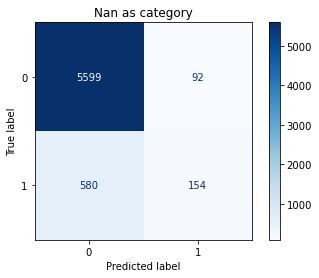

In [128]:
X = samadult_imputed.drop('DIBEV1', axis=1)
y = samadult_imputed['DIBEV1']

onehot_df = pd.get_dummies(X)

# Scale numerical features
scaler = StandardScaler()
columns_to_scale = ["AGE_P", "BMI"]
onehot_df[columns_to_scale] = scaler.fit_transform(onehot_df[columns_to_scale])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(onehot_df, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Model (Nan as category) Accuracy: {round(accuracy*100, 2)} %")
y_pred = model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Logistic Regression Model (Nan as category) F1 score: {round(f1*100, 2)} %")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Nan as category")
plt.show()